In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import pandas as pd
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
def cluster_plot(embedding_name,clusters=5):
    data = pd.read_csv('../embedding/embedding/'+embedding_name+'.csv',index_col=0)
    clu = KMeans(n_clusters=clusters,n_init=10)
    clu.fit(data.values)
    station2clu = dict(zip(data.index,clu.labels_)) 

    df = pd.read_csv('../data/coords_new.csv')
    df.columns = ['station','lng','lat']
    df['cluster'] = df['station'].apply(lambda x:'cluster'+str(station2clu[x]+1))
    df['size'] = [random.random() for _ in range(len(df))]
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat))  

    china = gpd.read_file("../data/chinaego/chinageo.shp")
    ax = gplt.polyplot(china)
    gplt.pointplot(gdf,ax=ax,hue='cluster',cmap='rainbow',legend=True,scale='size',limits=(2,3)) 



/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:255: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  'Please specify "legend_var" explicitly when both "hue" and "scale" are '


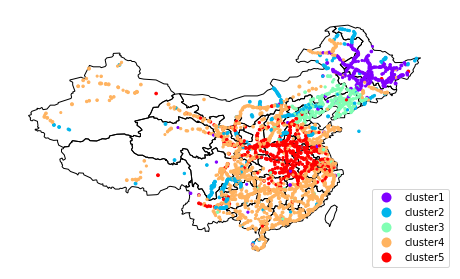

In [10]:
cluster_plot('prob_walk_whole_graph_128')

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:255: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  'Please specify "legend_var" explicitly when both "hue" and "scale" are '


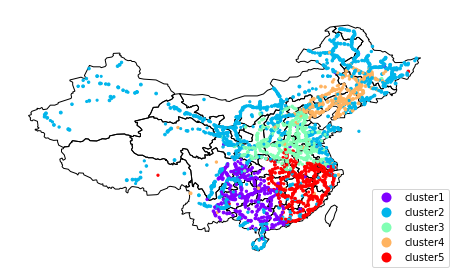

In [4]:
cluster_plot('random_walk_whole_graph_128')